# Atharva Vaidya
# 23CS60R41
# NLP - Assignment 3 - Task 1

# ---------------------------------------------------------------------------------------------------------------

# Task 1-A

# Word2Vec model and NN 

# libraries and dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows of the training dataset
print(train_df.head())


   index                                               text  label
0      0  Zimbabwe annual inflation drops to 209 percent...      0
1      1  More than 1,000 dead in Haiti (09/23/04)-- A m...      0
2      2  Seven die in Japan  #39;suicide pact #39; Japa...      0
3      3  Security No. 1 for Afghan head President Hamid...      0
4      4  Palestinians say they hope Bush accepts dealin...      0


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Atharva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Atharva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Preprocessing

In [2]:
# Define a function to clean the text
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Replace unwanted characters
    text = re.sub(r'\\', ' ', text)  # Replace backslashes with spaces
    text = re.sub(r'\&lt;/?[bgt]+\&gt;', '', text)  # Remove HTML tags like &lt;b&gt;
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'#\d+;', '', text)  # Remove hash numbers like #39;
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Return the cleaned text
    return ' '.join(words)

# Apply the cleaning function to the 'text' column directly
train_df['text'] = train_df['text'].apply(clean_text)
test_df['text'] = test_df['text'].apply(clean_text)

# Check the cleaned text
print(train_df.head())


   index                                               text  label
0      0  zimbabwe annual inflation drops percent report...      0
1      1  dead haiti mass grave haiti holds bodies may m...      0
2      2  seven die japan suicide pact japanese police f...      0
3      3  security afghan head president hamid karzai pr...      0
4      4  palestinians say hope bush accepts dealing ara...      0


# Tokenization 

In [3]:
# Tokenize sentences
train_tokenized = [word_tokenize(sentence) for sentence in train_df['text']]
test_tokenized = [word_tokenize(sentence) for sentence in test_df['text']]


# Word2Vec Model

# Download the Word2Vec model from Python library gensim.models

In [52]:
import gensim.downloader as api

# Load the pre-trained Word2Vec model
word2vec_model = api.load('word2vec-google-news-300')

# function to calculate the average vector for each sentence
def sentence_to_avg_vector(sentence, model):
    vectors = [model[word] for word in sentence if word in model]
    if len(vectors) == 0:
        return np.zeros(300)  # Use 300 because the pre-trained model has 300-dimensional vectors
    else:
        return np.mean(vectors, axis=0)

# Generate feature vectors for the training and testing sets
train_vectors = np.array([sentence_to_avg_vector(sentence, word2vec_model) for sentence in train_tokenized])
test_vectors = np.array([sentence_to_avg_vector(sentence, word2vec_model) for sentence in test_tokenized])

# Check the shape of the generated feature vector
print(train_vectors.shape)
print(test_vectors.shape)


(2000, 300)
(500, 300)


# Training and evaluation 

Epoch 1/20 - Loss: 1.3342490419745445
Epoch 2/20 - Loss: 0.7636880492791533
Epoch 3/20 - Loss: 0.5165558280423284
Epoch 4/20 - Loss: 0.4112724685110152
Epoch 5/20 - Loss: 0.3691287524998188
Epoch 6/20 - Loss: 0.356366487685591
Epoch 7/20 - Loss: 0.335458823479712
Epoch 8/20 - Loss: 0.3174627139233053
Epoch 9/20 - Loss: 0.3191394293680787
Epoch 10/20 - Loss: 0.3014697222970426
Epoch 11/20 - Loss: 0.28707222640514374
Epoch 12/20 - Loss: 0.2778952154330909
Epoch 13/20 - Loss: 0.25629640673287213
Epoch 14/20 - Loss: 0.26239574677310884
Epoch 15/20 - Loss: 0.24810648243874311
Epoch 16/20 - Loss: 0.2346387798897922
Epoch 17/20 - Loss: 0.22247639182023704
Epoch 18/20 - Loss: 0.20974952867254615
Epoch 19/20 - Loss: 0.21135730133391917
Epoch 20/20 - Loss: 0.19533128989860415
Test Accuracy: 0.88
Test F1 Score: 0.8808079062356072
[[108   5   9   3]
 [  1 117   3   4]
 [  4   2 107  12]
 [  0   2  15 108]]
              precision    recall  f1-score   support

           0       0.96      0.86    

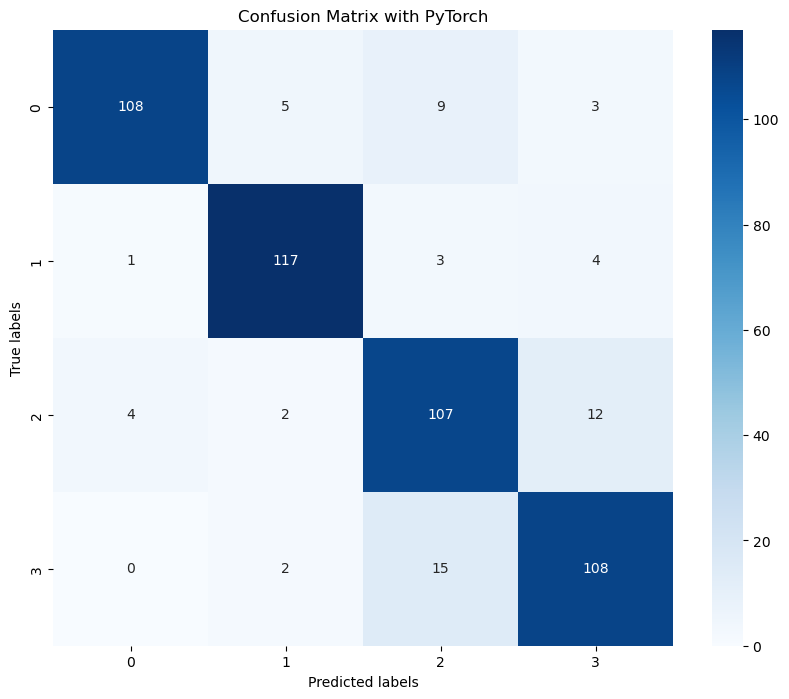

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the label encoder and encode the labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df['label'])
test_labels_encoded = label_encoder.transform(test_df['label'])

# Convert the feature vectors and labels to PyTorch tensors
X_train_tensor = torch.tensor(train_vectors, dtype=torch.float32)
y_train_tensor = torch.tensor(train_labels_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(test_vectors, dtype=torch.float32)
y_test_tensor = torch.tensor(test_labels_encoded, dtype=torch.long)

# Create TensorDatasets and DataLoaders for the train and test sets
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_dim, 256)
        self.layer2 = nn.Linear(256, 128)
        self.dropout = nn.Dropout(0.5)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, output_dim)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout(x)
        x = torch.relu(self.layer2(x))
        x = self.dropout(x)
        x = torch.relu(self.layer3(x))
        x = self.layer4(x)
        return x

# Set the input and output dimensions
input_dim = 300  # For pre-trained Word2Vec embeddings
output_dim = len(np.unique(train_labels_encoded))

# Initialize the neural network
model = NeuralNetwork(input_dim, output_dim)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to train the neural network and return training losses
def train_nn(model, criterion, optimizer, train_loader, epochs=100):
    model.train()  # Set the model to training mode
    train_losses = []
    for epoch in range(epochs):
        total_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        average_loss = total_loss / len(train_loader)
        train_losses.append(average_loss)
        print(f'Epoch {epoch+1}/{epochs} - Loss: {average_loss}')
    return train_losses

# Train the model and get the training losses
train_losses = train_nn(model, criterion, optimizer, train_loader, epochs=20)
# Function to evaluate the neural network
def evaluate_nn(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    predictions = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())
    return predictions

# Get predictions for the test set
test_predictions = evaluate_nn(model, test_loader)

# Calculate metrics
test_accuracy = accuracy_score(y_test_tensor.numpy(), test_predictions)
test_f1_score = f1_score(y_test_tensor.numpy(), test_predictions, average='macro')

# Print metrics
print(f'Test Accuracy: {test_accuracy}')
print(f'Test F1 Score: {test_f1_score}')

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test_tensor.numpy(), test_predictions)
print(conf_matrix)
print(classification_report(y_test_tensor.numpy(), test_predictions))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with PyTorch')
plt.show()

# Save predictions to a CSV file
test_df['preds'] = test_predictions
test_df.to_csv("w2v_test.csv", index=False)



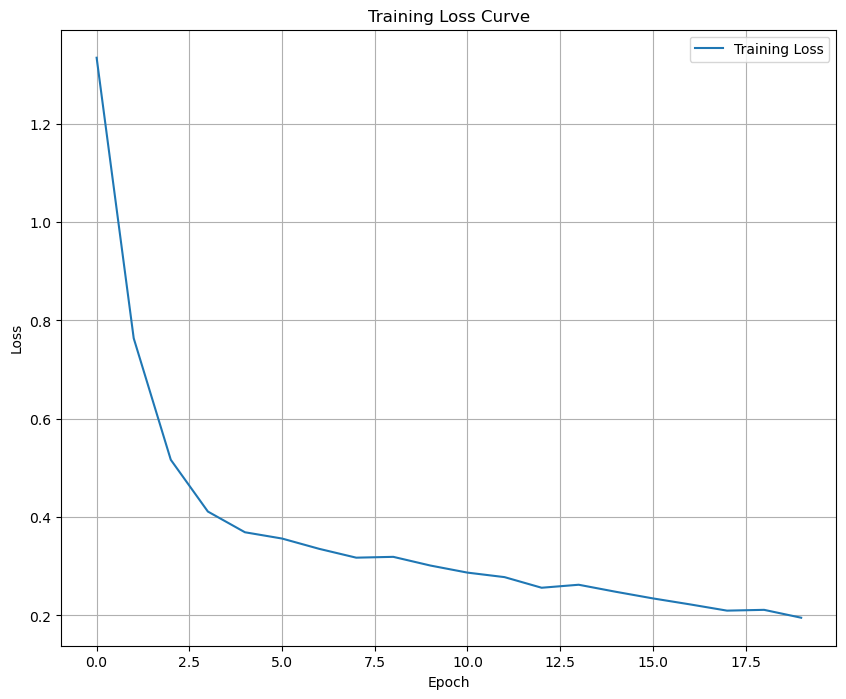

In [54]:
# Plot the training loss curve
plt.figure(figsize=(10, 8))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# TASK 1-B

# RNN

# Preprocessing already done in part 1-A

# Data Batching :

#  (a) Define Maximum Sequence Length
First, we need to determine a suitable maximum sequence length for the sentences in your dataset. A common approach is to analyze the distribution of sentence lengths and choose a value that captures the majority of the sentences without being overly long, such as the 90th percentile of lengths.

find an appropriate maximum sequence length:

In [55]:
# Calculate the length of each sentence
sentence_lengths = [len(sentence.split()) for sentence in train_df['text']]

# Compute the 90th percentile of these lengths
max_seq_length = int(np.percentile(sentence_lengths, 90))
print(f"The 90th percentile of sentence lengths is: {max_seq_length}")



The 90th percentile of sentence lengths is: 32


# (b) Tokenize and Pad/Truncate Sentences
Using PyTorch's torchtext library for tokenization and padding makes these tasks straightforward. However, since we've encountered issues with torchtext, let's manually handle the tokenization and padding/truncation:


In [56]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenize and build vocabulary
tokenized_texts = [word_tokenize(text.lower()) for text in train_df['text']]
vocab_counter = Counter(word for text in tokenized_texts for word in text)

# Create a mapping from words to indices
vocab = {word: i+1 for i, word in enumerate(vocab_counter)}  # start indexing from 1
vocab['<pad>'] = 0  # add a padding token

# Function to encode text to sequence of indices
def encode(text, vocab, max_seq_length):
    tokens = word_tokenize(text.lower())
    encoded = [vocab.get(token, 0) for token in tokens[:max_seq_length]]  # use 0 if token is not found
    return encoded + [0] * (max_seq_length - len(encoded))  # pad sequence if needed

# Encode and pad/truncate the sequences
train_encoded = torch.tensor([encode(text, vocab, max_seq_length) for text in train_df['text']])
test_encoded = torch.tensor([encode(text, vocab, max_seq_length) for text in test_df['text']])


# (c) DataLoader Setup
Now, we'll create DataLoader instances for batch processing:

In [57]:
from torch.utils.data import TensorDataset, DataLoader

# Assuming the labels are already integer encoded
train_labels_tensor = torch.tensor(train_labels_encoded, dtype=torch.long)
test_labels_tensor = torch.tensor(test_labels_encoded, dtype=torch.long)

# Create TensorDatasets
train_dataset = TensorDataset(train_encoded, train_labels_tensor)
test_dataset = TensorDataset(test_encoded, test_labels_tensor)

# Create DataLoaders
batch_size = 64  # You can adjust this based on your system's capabilities
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [58]:
# Inspect a single batch from the train_loader
train_features, train_labels = next(iter(train_loader))

print("Shape of train_features:", train_features.shape)
print("Type of train_features:", train_features.dtype)
print("Shape of train_labels:", train_labels.shape)
print("Type of train_labels:", train_labels.dtype)

# Same for the test_loader
test_features, test_labels = next(iter(test_loader))

print("\nShape of test_features:", test_features.shape)
print("Type of test_features:", test_features.dtype)
print("Shape of test_labels:", test_labels.shape)
print("Type of test_labels:", test_labels.dtype)


Shape of train_features: torch.Size([64, 32])
Type of train_features: torch.int64
Shape of train_labels: torch.Size([64])
Type of train_labels: torch.int64

Shape of test_features: torch.Size([64, 32])
Type of test_features: torch.int64
Shape of test_labels: torch.Size([64])
Type of test_labels: torch.int64


# ---------------------------------------------------------------------------------------------------------------

Generating the embedding matrix :

In [59]:
import gensim.downloader as api

# Load the pre-trained Word2Vec model
word2vec_model = api.load('word2vec-google-news-300')

# Create the embedding matrix
embedding_dim = 300  # Word2Vec model dimension
vocab_size = len(vocab) + 1  # Assuming 'vocab' is already defined

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in vocab.items():
    embedding_vector = word2vec_model[word] if word in word2vec_model else None
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


# ------------------------------------------Vanilla RNN---------------------------------------------------- 

In [60]:
import torch
import torch.nn as nn

class VanillaRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, num_classes, bidirectional=True, dropout=0.2):
        super(VanillaRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
        self.embedding.weight.requires_grad = False

        # Define the RNN layer
        self.rnn = nn.RNN(embedding_dim, hidden_size, bidirectional=bidirectional, batch_first=True)
        
        # Define a dropout layer
        self.dropout = nn.Dropout(dropout)
        
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_size * 2 if bidirectional else hidden_size, num_classes)

    def forward(self, x):
        # Pass input through embedding layer
        embedded = self.embedding(x)
        
        # Pass embeddings through RNN
        output, _ = self.rnn(embedded)
        
        # Apply dropout
        output = self.dropout(torch.mean(output, dim=1))
        
        # Pass output through fully connected layer
        output = self.fc(output)
        return output


# initialize the VanillaRNN model :

In [61]:
# Parameters
vocab_size = len(vocab) + 1  # plus 1 for padding
embedding_dim = 300  # Using 300 for word2vec dimension
hidden_size = 128  # Can be tuned using hyperparameter optimization
num_classes = train_df['label'].nunique()
bidirectional = True
dropout = 0.5

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = train_df['label'].nunique()
print(device)
model = VanillaRNN(vocab_size, embedding_dim, hidden_size, num_classes, bidirectional, dropout)
model = model.to(device)




cpu


# Define Loss Function and Optimizer :

In [62]:
criterion = nn.CrossEntropyLoss()  # Suitable for classification tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Learning rate can be tuned


# Training Loop :

In [70]:
epochs = 20  # Can be adjusted
rnn_train_losses = []

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(texts)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
#         print("working ..")

    average_loss = total_loss / len(train_loader)
    rnn_train_losses.append(average_loss)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {average_loss:.4f}')


Epoch 1/20, Loss: 0.1591
Epoch 2/20, Loss: 0.1620
Epoch 3/20, Loss: 0.1672
Epoch 4/20, Loss: 0.1635
Epoch 5/20, Loss: 0.1622
Epoch 6/20, Loss: 0.1605
Epoch 7/20, Loss: 0.1629
Epoch 8/20, Loss: 0.1615
Epoch 9/20, Loss: 0.1656
Epoch 10/20, Loss: 0.1671
Epoch 11/20, Loss: 0.1577
Epoch 12/20, Loss: 0.1620
Epoch 13/20, Loss: 0.1677
Epoch 14/20, Loss: 0.1660
Epoch 15/20, Loss: 0.1636
Epoch 16/20, Loss: 0.1614
Epoch 17/20, Loss: 0.1652
Epoch 18/20, Loss: 0.1635
Epoch 19/20, Loss: 0.1606
Epoch 20/20, Loss: 0.1636


# Evaluation Loop:

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       125
           1       0.90      0.89      0.89       125
           2       0.83      0.80      0.82       125
           3       0.83      0.85      0.84       125

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



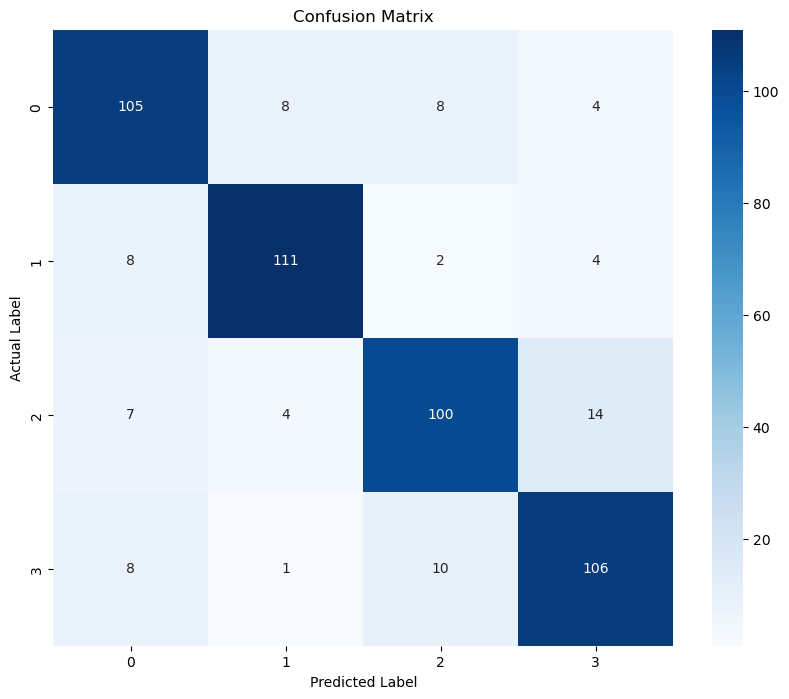

In [81]:

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming test_labels_encoded contains the true labels for the test set
true_labels = test_labels_encoded

# Get the predictions from the model
model.eval()
all_predictions = []

with torch.no_grad():
    for texts, labels in test_loader:
        texts = texts.to(device)
        outputs = model(texts)
        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.cpu().numpy())
        
        
# Add the predictions to the test dataframe
test_df['rnn_preds'] = all_predictions

# Save the dataframe to a CSV file
test_df.to_csv('rnn_test.csv', index=False)

# Calculate the classification report
class_report = classification_report(true_labels, all_predictions)
print("Classification Report:")
print(class_report)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# ----------------------------------------------LSTM --------------------------------------------------------

# LSTM model

In [72]:
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, bidirectional, dropout):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
        self.embedding.weight.requires_grad = False  # Optionally freeze the embeddings

        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=bidirectional, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        output, (hidden, cell) = self.lstm(embedded)
        output = self.dropout(output[:, -1, :])  # Use the last hidden state
        output = self.fc(output)
        return output

# Initialize the model :

In [73]:
# Parameters for LSTM
hidden_dim = 128  # Number of features in the hidden state
bidirectional = True  # Use a bidirectional LSTM
dropout = 0.5

# Initialize the LSTM model
lstm_model = LSTMModel(vocab_size, embedding_dim, hidden_dim, num_classes, bidirectional, dropout)
lstm_model = lstm_model.to(device)

# Define Loss Function and Optimizer :

In [74]:
optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop :

In [78]:
lstm_train_losses = []

for epoch in range(epochs):
    lstm_model.train()
    total_loss = 0
    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = lstm_model(texts)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    average_loss = total_loss / len(train_loader)
    lstm_train_losses.append(average_loss)
    print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}')

Epoch 1, Loss: 0.29038958239834756
Epoch 2, Loss: 0.271456035785377
Epoch 3, Loss: 0.27120111091062427
Epoch 4, Loss: 0.2514864052645862
Epoch 5, Loss: 0.2588131108786911
Epoch 6, Loss: 0.28415487986057997
Epoch 7, Loss: 0.26433773105964065
Epoch 8, Loss: 0.24437629792373627
Epoch 9, Loss: 0.23849304905161262
Epoch 10, Loss: 0.23418563976883888
Epoch 11, Loss: 0.23788254405371845
Epoch 12, Loss: 0.20903933269437402
Epoch 13, Loss: 0.3245592007879168
Epoch 14, Loss: 0.32232873793691397
Epoch 15, Loss: 0.24725464056245983
Epoch 16, Loss: 0.24053579126484692
Epoch 17, Loss: 0.277883832808584
Epoch 18, Loss: 0.2526153514627367
Epoch 19, Loss: 0.25950646214187145
Epoch 20, Loss: 0.21687763812951744


# Evaluation Loop :

Accuracy: 0.8340
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       125
           1       0.90      0.90      0.90       125
           2       0.79      0.78      0.79       125
           3       0.78      0.86      0.82       125

    accuracy                           0.83       500
   macro avg       0.84      0.83      0.83       500
weighted avg       0.84      0.83      0.83       500



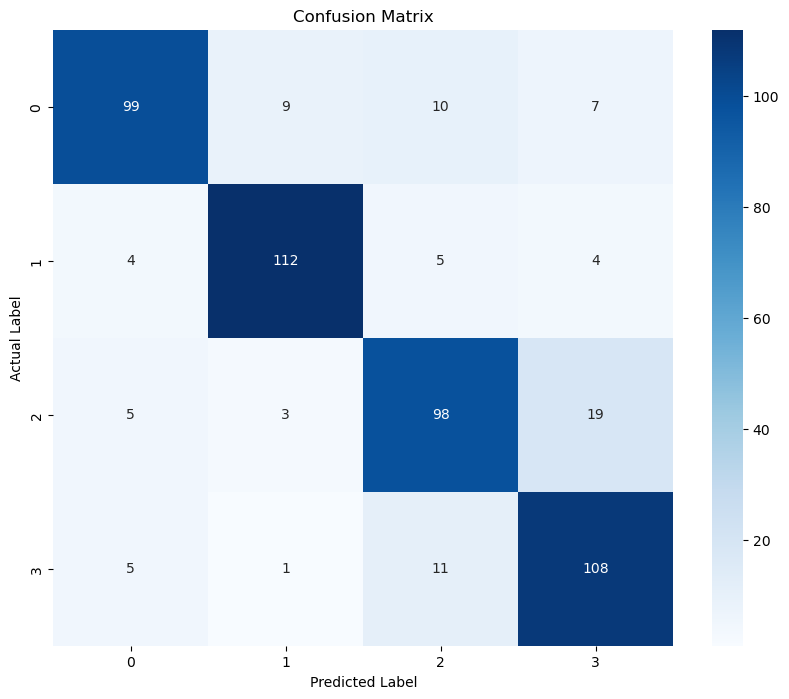

In [82]:
# Evaluate the LSTM model
lstm_model.eval()
all_predictions = []

with torch.no_grad():
    for texts, labels in test_loader:
        texts = texts.to(device)
        outputs = lstm_model(texts)
        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.cpu().numpy())

        
# Add the predictions to the test dataframe
test_df['lstm_preds'] = all_predictions

# Save the dataframe to a CSV file
test_df.to_csv('lstm_test.csv', index=False)


accuracy = accuracy_score(test_labels_encoded, all_predictions)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print the classification report
class_report = classification_report(test_labels_encoded, all_predictions)
print("Classification Report:")
print(class_report)

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(test_labels_encoded, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

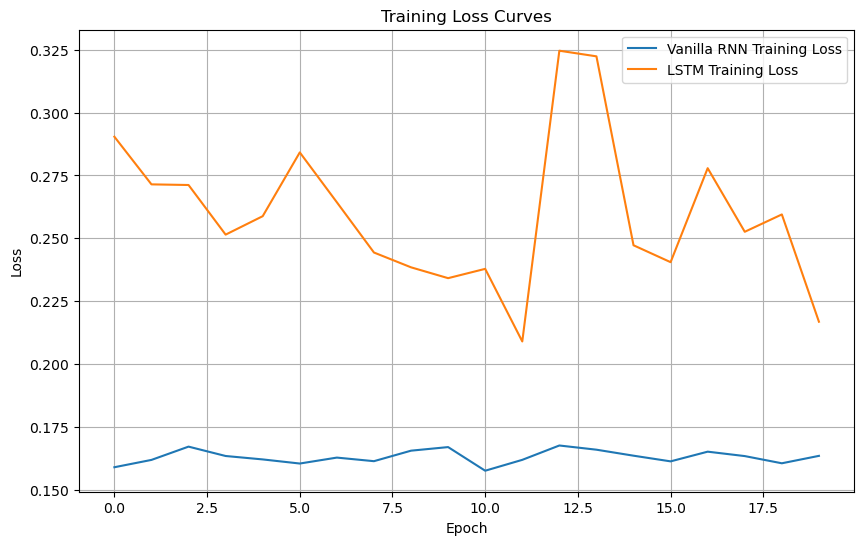

In [80]:
import matplotlib.pyplot as plt

# Plotting the training loss curves
plt.figure(figsize=(10, 6))
plt.plot(rnn_train_losses, label='Vanilla RNN Training Loss')
plt.plot(lstm_train_losses, label='LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curves')
plt.legend()
plt.grid(True)
plt.show()
